In [1]:
import torch 
from torch import nn
from d2l import torch as d2l

# Alexnet
## 前言
由于论文中的网络结构有些离奇，所以我结合了论文、[WIKI](https://en.wikipedia.org/wiki/AlexNet)以及[李牧老师课程](https://zh-v2.d2l.ai/chapter_convolutional-modern/alexnet.html)上的相关结构，以下图中的网络结构作为本次实验实现的Alexnet，并对相关数据集进行训练


## 数据集
本实验的数据集采用**[Fashion-MNIST](https://en.wikipedia.org/wiki/Fashion_MNIST)** 数据集，该数据集由10个种类的时尚单品组成，包含70000张分辨率为28×28的灰度图像。由于Alexnet的输入图像要求是227×227，所以需要将图像分别率resize到227。

## Alexnet网络实现
基于pytorch实现Alexnet

In [5]:
net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11, stride=4), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    #nn.Linear(6400, 4096), nn.ReLU(),
    nn.Linear(9216, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 10)
)

构造一个和输入图像维度相同的数据来观察每层输出的形状

In [8]:
X = torch.randn(1,1,227,227)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Conv2d output shape:	 torch.Size([1, 96, 55, 55])
ReLU output shape:	 torch.Size([1, 96, 55, 55])
MaxPool2d output shape:	 torch.Size([1, 96, 27, 27])
Conv2d output shape:	 torch.Size([1, 256, 27, 27])
ReLU output shape:	 torch.Size([1, 256, 27, 27])
MaxPool2d output shape:	 torch.Size([1, 256, 13, 13])
Conv2d output shape:	 torch.Size([1, 384, 13, 13])
ReLU output shape:	 torch.Size([1, 384, 13, 13])
Conv2d output shape:	 torch.Size([1, 384, 13, 13])
ReLU output shape:	 torch.Size([1, 384, 13, 13])
Conv2d output shape:	 torch.Size([1, 256, 13, 13])
ReLU output shape:	 torch.Size([1, 256, 13, 13])
MaxPool2d output shape:	 torch.Size([1, 256, 6, 6])
Flatten output shape:	 torch.Size([1, 9216])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

## 训练
根据李牧老师课程中的相关问题，对模型进行不同的调整并训练得到结果
1. 试着增加迭代轮数。对比LeNet的结果有什么不同？为什么？
1. AlexNet对Fashion-MNIST数据集来说可能太复杂了。
    1. 尝试简化模型以加快训练速度，同时确保准确性不会显著下降。
    1. 设计一个更好的模型，可以直接在$28 \times 28$图像上工作。
1. 修改批量大小，并观察模型精度和GPU显存变化。
1. 分析了AlexNet的计算性能。
    1. 在AlexNet中主要是哪部分占用显存？
    1. 在AlexNet中主要是哪部分需要更多的计算？
    1. 计算结果时显存带宽如何？
1. 将dropout和ReLU应用于LeNet-5，效果有提升吗？再试试预处理会怎么样？

## batch_size = 128
### lr=0.01 epochs=10

In [9]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=227)

loss 0.315, train acc 0.884, test acc 0.885
500.3 examples/sec on cuda:0


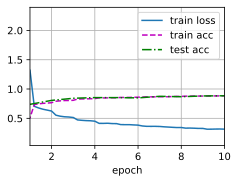

In [12]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.210, train acc 0.922, test acc 0.906
499.2 examples/sec on cuda:0


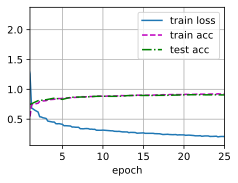

In [13]:
lr, num_epochs = 0.01, 25
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.105, train acc 0.961, test acc 0.927
497.8 examples/sec on cuda:0


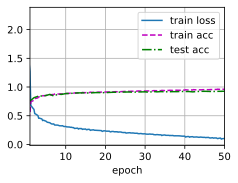

In [14]:
lr, num_epochs = 0.01, 50
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

## 简化模型

In [15]:
net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11, stride=4), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    #nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    #nn.Linear(6400, 4096), nn.ReLU(),
    nn.Linear(9216, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 10)
)

In [16]:
X = torch.randn(1,1,227,227)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Conv2d output shape:	 torch.Size([1, 96, 55, 55])
ReLU output shape:	 torch.Size([1, 96, 55, 55])
MaxPool2d output shape:	 torch.Size([1, 96, 27, 27])
Conv2d output shape:	 torch.Size([1, 256, 27, 27])
ReLU output shape:	 torch.Size([1, 256, 27, 27])
MaxPool2d output shape:	 torch.Size([1, 256, 13, 13])
Conv2d output shape:	 torch.Size([1, 384, 13, 13])
ReLU output shape:	 torch.Size([1, 384, 13, 13])
Conv2d output shape:	 torch.Size([1, 256, 13, 13])
ReLU output shape:	 torch.Size([1, 256, 13, 13])
MaxPool2d output shape:	 torch.Size([1, 256, 6, 6])
Flatten output shape:	 torch.Size([1, 9216])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


loss 0.212, train acc 0.921, test acc 0.912
606.4 examples/sec on cuda:0


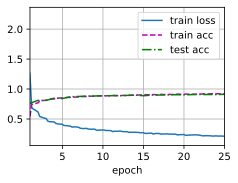

In [17]:
lr, num_epochs = 0.01, 25
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

## 设计一个更好的模型，使得能够直接对28×28的图像进行训练
先说说思路吧，首先输入图像尺寸在28×28这样的小尺寸的话，卷积核基本上只能使用3×3或者5×5了，而且为了避免由于卷积操作带来的尺寸的减小，需要使用same padding来保留一个相对较大的尺寸。此外，由于像素数量不多，所以可以适当减少卷积层，简化网络模型。当然，最后的全连结层的维度也需要进行修改，以适应输入尺寸的变化。可以用小一点的epoch多调整几次。

In [18]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [24]:
net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=5,padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=1),
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    #nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    #nn.Linear(6400, 4096), nn.ReLU(),
    nn.Linear(9216, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 10)
)

In [25]:
X = torch.randn(1,1,28,28)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Conv2d output shape:	 torch.Size([1, 96, 28, 28])
ReLU output shape:	 torch.Size([1, 96, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 96, 14, 14])
Conv2d output shape:	 torch.Size([1, 256, 14, 14])
ReLU output shape:	 torch.Size([1, 256, 14, 14])
MaxPool2d output shape:	 torch.Size([1, 256, 13, 13])
Conv2d output shape:	 torch.Size([1, 384, 13, 13])
ReLU output shape:	 torch.Size([1, 384, 13, 13])
Conv2d output shape:	 torch.Size([1, 256, 13, 13])
ReLU output shape:	 torch.Size([1, 256, 13, 13])
MaxPool2d output shape:	 torch.Size([1, 256, 6, 6])
Flatten output shape:	 torch.Size([1, 9216])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


loss 0.275, train acc 0.898, test acc 0.890
881.0 examples/sec on cuda:0


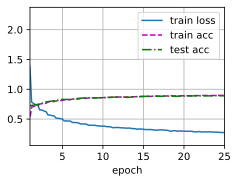

In [26]:
lr, num_epochs = 0.01, 25
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

## 分析AlexNet的计算性能
### 在AlexNet中主要是哪部分占用显存？
主要是神经网络的参数在占用显存，训练过程中的权重和偏置等这些参数需要存储在显存中，以便在前向传播和反向传播中进行计算。此外，还会占用一些显存用于存储中间计算结果。
### 在AlexNet中主要是哪部分需要更多的计算？
主要是卷积层和全连结层中设计到的大量的矩阵乘法和卷积运算，需要进行大量的浮点数计算。
### 计算结果时显存带宽如何？